In [3]:
import pandas as pd
import seaborn as sns

In [9]:
metadata = pd.read_csv('./data/EDA/metadata.csv')
metadata = metadata.astype(str)
metadata.head()

,cell_id,day,donor,cell_type,technology
0,c2150f55becb,2,27678,HSC,citeseq
1,65b7edf8a4da,2,27678,HSC,citeseq
2,c1b26cb1057b,2,27678,EryP,citeseq
3,917168fa6f83,2,27678,NeuP,citeseq
4,2b29feeca86d,2,27678,EryP,citeseq


In [25]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281528 entries, 0 to 281527
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   cell_id     281528 non-null  object
 1   day         281528 non-null  object
 2   donor       281528 non-null  object
 3   cell_type   281528 non-null  object
 4   technology  281528 non-null  object
dtypes: object(5)
memory usage: 10.7+ MB


In [10]:
# Cells are destroyed by analysis, so each cell is only observed once (1 `cell_id` per row)
print(metadata.groupby("cell_id").nunique().shape[0] == metadata.shape[0])

True


In [11]:
# 4 donors each have 8 cell types, 5 days, and 2 assays 
# Donor 27678 has ~20% fewer samples
metadata.groupby(['donor']).nunique()

,cell_id,day,cell_type,technology
donor,,,,
13176,73211,5,8,2
27678,60995,5,8,2
31800,74963,5,8,2
32606,72359,5,8,2


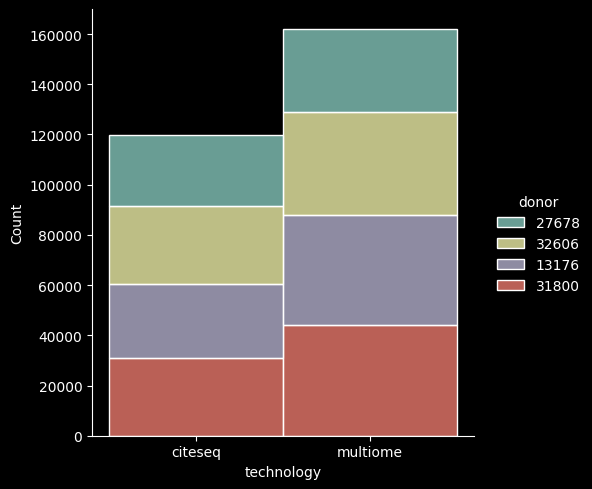

In [36]:
# Consistently more multiome samples across donors
sns.displot(metadata, x="technology", hue="donor", multiple="stack")

In [12]:
# `hidden` cell types have only 1 assay, `multiome`
_ = metadata[metadata.cell_type == 'hidden']['technology'].nunique() == 1
metadata[metadata.cell_type == 'hidden']['technology'].head(1)

119651    multiome
Name: technology, dtype: object

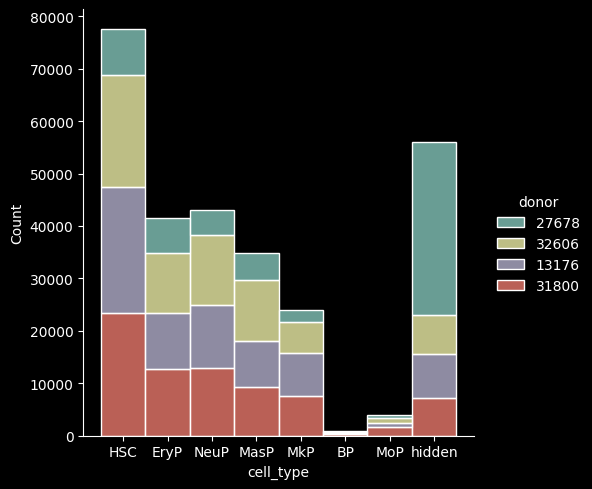

In [17]:
# large imbalances across cell types and donors
# Donor 27678 mostly `hidden`, 
# `BP` cell type very low sample size
sns.displot(metadata, x="cell_type", hue="donor", multiple="stack")

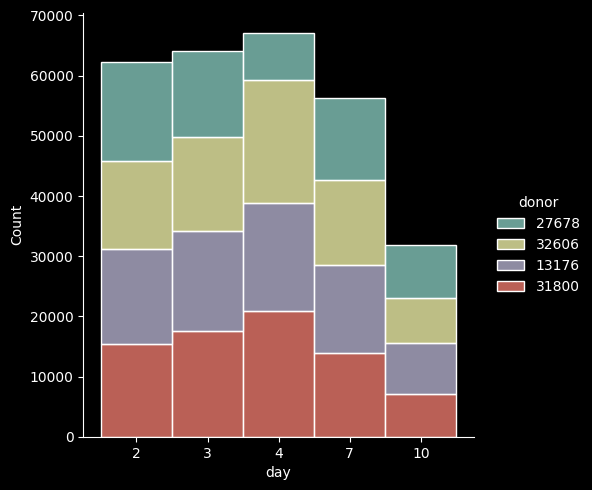

In [22]:
# Sample spacing is unevenly paced, and sized
sns.displot(metadata, x="day", hue="donor", multiple="stack")